In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
%matplotlib inline


In [ ]:
#Generate sample data
centers = [[1,1],[-1,-1],[1,-1]]
X, y = make_blobs(n_samples = 10000, centers = centers, cluster_std = 0.6)

In [ ]:
#Identify Bandwidth
bandwidth = estimate_bandwidth(X, quantile = 0.2)

In [ ]:
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(X)
labels = ms.labels_
cluster_centers  = ms.cluster_centers_

In [ ]:
labels_unique = np.unique(labels)
n_clusters= len(labels_unique)

print("number of estimated clusters: %d" % n_clusters)


In [ ]:
#plot result
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(X[:,0],X[:,1],s=5,c=y)
ax[0].set_title('Original Data Distribution')
ax[1].scatter(X[:,0],X[:,1],s=5,c=labels)
ax[1].plot(cluster_centers[:,0],cluster_centers[:,1], 'o', markersize=10, c='black')
ax[1].set_title('Estimated number of clusters : %d' %n_clusters)
plt.show()

# Image segmentation using Mean-Shift Algorithm

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
img = Image.open("C:\\Users\\venka\\OneDrive\\Desktop\\Vending_Machine.jpg")
img = np.array(img)
print(img.shape)

In [ ]:
flatten_img = np.reshape(img, [-1,3])
print(flatten_img.shape)

In [ ]:
#Identify Bandwidth
est_bandwidth = estimate_bandwidth(flatten_img, quantile = 0.2, n_samples = 500)
#est_bandwidth = estimate_bandwidth(flatten_img, quantile = 0.5, n_samples = 500)


In [ ]:
ms = MeanShift(bandwidth = est_bandwidth, bin_seeding = True)
ms.fit(flatten_img)
labels = ms.labels_
cluster_centers  = ms.cluster_centers_

In [ ]:
labels_unique = np.unique(labels)
n_clusters= len(labels_unique)

print("number of estimated clusters: %d" % n_clusters)

In [ ]:
#plot result
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].axis('off')
ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].axis('off')
ax[1].set_title('Segmented Image')
ax[1].imshow(np.reshape(labels, img.shape[:-1]))

plt.show()

# Kernel Based Classifier

In [ ]:
def GaussianKernel(X_arr,X, X_central):
    sig_arr = np.std(X_arr,axis = 0)
    sig_arr = np.ravel(sig_arr)
    dist_sum = 0
    for i in range(len(X)):
        d1 = [X[i]-X_central[i]]/sig_arr[i]
        dist_sum += d1**2
        kernel_val = np.exp(-0.5*dist_sum)
    return(kernel_val)

# Object Tracking

In [1]:
import numpy as np
import cv2

In [ ]:
def resize(img):
    return cv2.resize(img,(512,512)) # arg1- input image, arg- output_width, output_height

In [ ]:
cap=cv2.VideoCapture("C:\\Users\\venka\\Downloads\\ballmotion.m4v")
ret,frame=cap.read()

while ret==True:
    ret,frame=cap.read()
    #cv2.imshow("frame",resize(frame))
    cv2.imshow("frame",frame)
    key=cv2.waitKey(10)
    if key==ord('q') or ret == False:
        break
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
cap=cv2.VideoCapture('C:\\Users\\venka\\Downloads\\ballmotion.m4v')
ret,frame=cap.read()
hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
cv2.imshow("frame",frame)

#key=cv2.waitKey(1)
#if key==ord('q') or ret == False:
#    break
#    
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

cap=cv2.VideoCapture('C:\\Users\\venka\\Downloads\\ballmotion.m4v')
#cap=cv2.VideoCapture('C:\\Users\\venka\\Downloads\\slow_traffic_small.mp4')

ret,frame=cap.read()
l_b=np.array([0,230,170])# lower hsv bound for red
u_b=np.array([255,255,220])# upper hsv bound to red

mask_arr = []
while ret==True:
    ret,frame=cap.read()

    #hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    #mask=cv2.inRange(hsv,l_b,u_b)
    
    #frame = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow('image', frame)
    
    #print(mask)
    #if len(mask_arr) == 0:
    #    mask_arr.append(mask)

    #cv2.imshow("frame",frame)

    #cv2.imshow("mask",mask)


    key=cv2.waitKey(1)
    if key==ord('q') or ret == False:
    #if  cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import os
print(os.getcwd())

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame( np.where(mask_arr!=0))
df.to_csv("t1.csv")

#print(type(mask_arr))

In [ ]:
cap=cv2.VideoCapture('C:\\Users\\venka\\Downloads\\ballmotion.m4v')


ret,frame=cap.read()
l_b=np.array([0,230,170])# lower hsv bound for red
u_b=np.array([255,255,220])# upper hsv bound to red

while ret==True:
    ret,frame=cap.read()

    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    mask=cv2.inRange(hsv,l_b,u_b)

    contours,_= cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #print(contours)
    max_contour = contours[0]
    for contour in contours:
        if cv2.contourArea(contour)>cv2.contourArea(max_contour):
            max_contour=contour

        contour=max_contour
        #print("-------------")
        approx=cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour,True),True)
        x,y,w,h=cv2.boundingRect(approx)
        print('X:', x)
        print("-----------")
        print(y)
        print("-----------")
        print(w)
        print("-----------")
        print(h)
        
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)

    cv2.imshow("frame",frame)
    
    #cv2.imshow("mask",mask)
    
    key=cv2.waitKey(1)
    if key==ord('q') or ret == False:
        break
        
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#(x,y,w,h) (178,1075,4,5)

In [ ]:
import cv2
cap = cv2.VideoCapture('C:\\Users\\venka\\Downloads\\slow_traffic_small.mp4')
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
x, y, w, h = 178, 2000, 4, 5 # simply hardcoded the values
track_window = (x, y, w, h)
cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)
cv2.imshow("frame",frame)
    
key=cv2.waitKey(10)
if key==ord('q') or ret == False: 
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [14]:
import numpy as np
import cv2 as cv

In [15]:
cap = cv.VideoCapture('C:\\Users\\venka\\Downloads\\slow_traffic_small.mp4')

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

# take first frame of the video
ret,frame = cap.read()
frame.shape


(360, 640, 3)

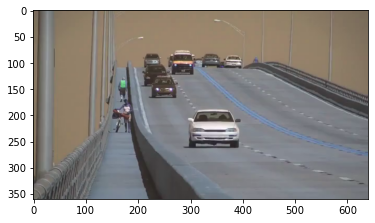

In [17]:
#Show the image with matplotlib
plt.imshow(frame)
plt.show()

In [18]:
cap=cv.VideoCapture("C:\\Users\\venka\\Downloads\\ballmotion.m4v")
ret,frame=cap.read()

while ret==True:
    ret,frame=cap.read()
    #cv2.imshow("frame",resize(frame))
    cv.imshow("frame",frame)
    #plt.imshow(frame)
    #plt.show()    

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [9]:
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("input_path")



NameError: name 'cv2' is not defined

In [4]:
# setup initial location of window
x, y, w, h = 300, 200, 100, 100 # simply hardcoded the values
track_window = (x, y, w, h)

In [5]:
# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

array([[  6.8     ],
       [  0.      ],
       [  0.      ],
       [  3.4     ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0.      ],
       [  0. 

In [15]:
# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 20, 1 )

In [16]:
ret = True
while ret==True:
    ret, frame = cap.read()

    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv.imshow('img2',img2)

        k = cv.waitKey(1) 
        if k==27 or ret == False: 
            break
  
cv.waitKey(0)
cv.destroyAllWindows()